In [ ]:
import keras as k
import scipy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping


from keras.models import Sequential
from keras.layers import Dense, Activation
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
home = '/home/nandhini/aozel/periodicBox'
phi=0.1
cohesion = ''

dp = 75
timestep=0.65
fsize = 9
data_signature = 'fsize' + str(fsize)+'phi'+str(phi)+'dp'+str(dp)+'timestep'+str(timestep) + cohesion
file_myData = "corrected_myDataFSUslip"+data_signature+".pickle"
file_target = "corrected_targetFSUslip"+data_signature+".pickle"

myData = pickle.load( open( file_myData, "rb" ) )
target = pickle.load( open( file_target, "rb" ) )

In [4]:
myData.shape

(1934712, 109)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(myData, target, test_size=0.5, random_state=42)

In [6]:
scaler = pickle.load( open( 'corrected_FSscale_version2', "rb" ) )
X_test_norm = scaler.transform(X_test)

In [7]:
X_test_norm.shape

(967356, 109)

In [8]:
r = np.array([1,2,3])

In [9]:
np.maximum(r,5)

array([5, 5, 5])

(0.64112390442915212, 0.0)


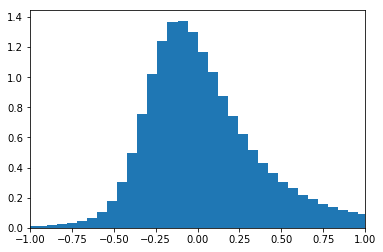

In [10]:
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='normal',input_dim=X_test_norm.shape[-1]))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
save_file = 'corrected_FSversion2_small_dp75.hdf5'
model.load_weights(save_file)

y_predict = model.predict(X_test_norm)
error_percent = (y_predict.reshape(-1)- y_test.reshape(-1))/y_test.reshape(-1)
errpd = plt.hist(error_percent,1000,range=(-30, 30), normed=True)
plt.xlim([-1, 1])

pred = y_predict.reshape(-1)
real = y_test.reshape(-1)
pred = np.maximum(pred,0)
pred = np.minimum(pred,1.5)
a = real.copy()
pred = pred[(a<1.5) & (a>0)]
real = real[(a<1.5) & (a>0)]
#b = pred.copy()
#pred = pred[(b<1.5) & (b>0)]
#real = real[(b<1.5) & (b>0)]

print(scipy.stats.pearsonr(pred,real))

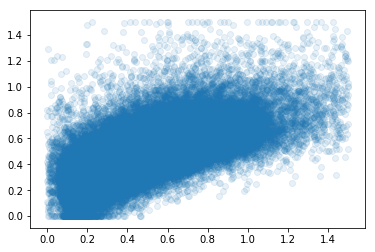

In [11]:
plt.scatter(real[:100000], pred[:100000],alpha=0.1)

In [ ]:
fig = plt.gcf()
fig.set_size_inches(5.5, 5.5)
plt.hexbin(real[:100000], pred[:100000],gridsize=80)
plt.xlim([0,1.2])
plt.ylim([0,1.2])
plt.xlabel('Actual Values $y$',fontsize='large')
plt.ylabel('Model Predictions $\hat{y}$ ',fontsize='large')
fig.savefig('surroundings.eps', dpi=100)

In [ ]:
import seaborn as sns

sns.set(style="ticks")
lm = sns.jointplot(real[:10000], pred[:10000], kind="hex", color="#4CB391",stat_func=None)
plt.xlim([0,1])

In [ ]:
model = Sequential()
#model.add(Dense(100, activation='relu', kernel_initializer='normal',input_dim=X_test_norm.shape[-1]))
#model.add(Dense(1, activation='linear', kernel_initializer='normal'))
save_file = 'corrected_FSversion2_small.hdf5'
model.add(Dense(100, input_dim=109))
model.add(Activation('relu'))
model.add(Dense(1))
model.load_weights(save_file)

y_predict = model.predict(X_test_norm)
error_percent = (y_predict.reshape(-1)- y_test.reshape(-1))/y_test.reshape(-1)
errpd = plt.hist(error_percent,1000,range=(-30, 30), normed=True)
plt.xlim([-1, 1])

real = y_predict.reshape(-1)
pred = y_test.reshape(-1)
pred = np.maximum(pred,0)
pred = np.minimum(pred,1.5)
a = real.copy()
pred = pred[(a<10) & (a>-10)]
real = real[(a<10) & (a>-10)]
print(scipy.stats.pearsonr(pred,real))

In [ ]:
model_json = model.to_json()
with open("corrected_nn_109to1.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("corrected_nn_109to1_weights.hdf5")

In [ ]:
plt.scatter(real,pred,alpha=0.1)
plt.xlim([-1, 2])
plt.ylim([-1, 2])

In [ ]:
import matplotlib as mpl

y_predict = model.predict(X_test_norm)
error_percent = (y_predict.reshape(-1)- y_test.reshape(-1))/y_test.reshape(-1)
errpd = plt.hist(error_percent,1000,range=(-30, 30), normed=True)
plt.xlim([-1, 1])


#mpl.rc("savefig", dpi=dpi)

In [ ]:
plt.xlabel?

In [ ]:
plt.plot(errpd[1][:-1]+errpd[1][1]-errpd[1][0],errpd[0],'k')
plt.xlim([-1,1])
plt.xlabel('$e_i$',fontsize=15)
plt.ylabel('Probability Density Function',fontsize=15)
import matplotlib as mpl
mpl.rc("savefig", dpi=200)

In [ ]:
row = np.ones((1,109))*2
for i in np.linspace(-1,10,1000):
    row[0,53] = i
    plt.scatter(i*scaler.std_[53] + scaler.mean_[53], model.predict(row))

In [ ]:
(model.layers[1].get_weights()[0]

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='normal',input_dim=X_test_norm.shape[-1]))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
save_file = 'corrected_FSversion2_mid.hdf5'
model.load_weights(save_file)

y_predict = model.predict(X_test_norm)
error_percent = (y_predict.reshape(-1)- y_test.reshape(-1))/y_test.reshape(-1)
errpd = plt.hist(error_percent,1000,range=(-30, 30), normed=True)
plt.xlim([-1, 1])

pred = y_predict.reshape(-1)
real = y_test.reshape(-1)
pred = np.maximum(pred,0)
pred = np.minimum(pred,1.5)
a = real.copy()
pred = pred[(a<10) & (a>-10)]
real = real[(a<10) & (a>-10)]
print(scipy.stats.pearsonr(pred,real))

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='normal',input_dim=5))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
save_file = 'corrected_version2_small_local.hdf5'
model.load_weights(save_file)

y_predict = model.predict(X_test_norm[:,np.array([0,53,54,55,56 ])])
error_percent = (y_predict.reshape(-1)- y_test.reshape(-1))/y_test.reshape(-1)
errpd = plt.hist(error_percent,1000,range=(-30, 30), normed=True)
plt.xlim([-1, 1])

pred = y_predict.reshape(-1)
real = y_test.reshape(-1)
#pred = np.maximum(pred,0)
#pred = np.minimum(pred,1.5)
a = real.copy()
pred = pred[(a<1.5) & (a>0)]
real = real[(a<1.5) & (a>0)]
b = pred.copy()
pred = pred[(b<1.5) & (b>0)]
real = real[(b<1.5) & (b>0)]

print(scipy.stats.pearsonr(pred,real))

In [ ]:
plt.scatter(real[:100000], pred[:100000],alpha=0.1)

In [ ]:
fig = plt.gcf()
fig.set_size_inches(5.5, 5.5)
plt.hexbin(real[:100000], pred[:100000],gridsize=80)
plt.xlim([0,1.2])
plt.ylim([0,1.2])
plt.xlabel('Actual Values $y$',fontsize='large')
plt.ylabel('Model Predictions $\hat{y}$ ',fontsize='large')
fig.savefig('locals.eps', dpi=100)

In [ ]:
import seaborn as sns
sns.set(style="ticks")
lm = sns.jointplot(real[:10000], pred[:10000], kind="hex", color="#4CB391")
plt.xlim([0,1])

In [ ]:
model.predict

In [ ]:
scaler.mean_[53]

In [ ]:
scaler.std_[53]

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='normal',input_dim=4))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
model.compile(loss='mean_absolute_error', optimizer='Adam')
save_file = 'version2_small_local.hdf5'
model.load_weights(save_file)
checkpointer = ModelCheckpoint(filepath=save_file, verbose=1, save_best_only=True)

y_predict = model.predict(X_test_norm[:,52:56])
error_percent = (y_predict.reshape(-1)- y_test.reshape(-1))/y_test.reshape(-1)
errpd = plt.hist(error_percent,1000,range=(-30, 30), normed=True)
plt.xlim([-1, 1])

real = y_predict.reshape(-1)
pred = y_test.reshape(-1)
pred = pred[(real<2) & (real>0)]
real = real[(real<2) & (real>0)]
print(scipy.stats.pearsonr(pred,real))
print(np.mean(np.abs(real-pred)))
#model.fit(X_train_norm, y_train, batch_size=512, epochs=40, verbose=1, validation_data=(X_dev_norm, y_dev), callbacks=[checkpointer])

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='normal',input_dim=X_test_norm.shape[-1]))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
model.compile(loss='mean_absolute_error', optimizer='Adam')
save_file = 'version2_small.hdf5'
model.load_weights(save_file)
checkpointer = ModelCheckpoint(filepath=save_file, verbose=1, save_best_only=True)
#model.fit(X_train_norm, y_train, batch_size=512, epochs=40, verbose=1, validation_data=(X_dev_norm, y_dev), callbacks=[checkpointer])

In [ ]:
y_predict = model.predict(X_test_norm)
error_percent = (y_predict.reshape(-1)- y_test.reshape(-1))/y_test.reshape(-1)
errpd = plt.hist(error_percent,1000,range=(-30, 30), normed=True)
plt.xlim([-1, 1])

real = y_predict.reshape(-1)
pred = y_test.reshape(-1)
#pred = pred[(real<2) & (real>0)]
#real = real[(real<2) & (real>0)]
print(scipy.stats.pearsonr(pred,real))
print(np.mean(np.abs(real-pred)))

In [ ]:
model = Sequential()

model.add(Dense(100, activation='relu', kernel_initializer='normal',input_dim=X_realTT_norm.shape[-1]))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(32, activation='relu', kernel_initializer='normal'))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))
model.add(Dense(8, activation='relu', kernel_initializer='normal'))
model.add(Dense(4, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
model.compile(loss='mean_absolute_error', optimizer='Adam')
file = 'weights_Uslip3' + str(fsize) + '.hdf5'
model.load_weights(file)
#checkpointer = ModelCheckpoint(filepath=file, verbose=1, save_best_only=True)
#model.fit(X_train_norm, y_train, batch_size=128, epochs=60, verbose=1, validation_data=(X_realCV_norm, y_realCV), callbacks=[checkpointer])

$\phi$ = 0.1, d = 75 mm, time = 0.6



In [ ]:
y_predict = model.predict(X_realTT_norm)
error_percent = (y_predict.reshape(-1) - y_realTT.reshape(-1))/y_realTT.reshape(-1)
errpd = plt.hist(error_percent,4000,normed=True)
plt.xlim([-2, 2])

$\phi$ = 0.1, d = 75 mm, time = 0.65



In [ ]:
y_predict = model.predict(X_realTT_norm)
error_percent = (y_predict.reshape(-1) - y_realTT.reshape(-1))/y_realTT.reshape(-1)
errpd = plt.hist(error_percent,4000,normed=True)
plt.xlim([-2, 2])

$\phi$ = 0.1, d = 150 mm, time = 0.65




In [ ]:
y_predict = model.predict(X_realTT_norm)
error_percent = (y_predict.reshape(-1) - y_realTT.reshape(-1))/y_realTT.reshape(-1)
errpd = plt.hist(error_percent,4000,normed=True)
plt.xlim([-2, 2])

$\phi$ = 0.1, d = 300 mm, time = 0.65



In [ ]:
y_predict = model.predict(X_realTT_norm)
error_percent = (y_predict.reshape(-1) - y_realTT.reshape(-1))/y_realTT.reshape(-1)
errpd = plt.hist(error_percent,4000,normed=True)
plt.xlim([-2, 2])

In [ ]:
y_predict = model.predict(X_realTT_norm)
error_percent = (y_predict.reshape(-1) - y_realTT.reshape(-1)/4)/(y_realTT.reshape(-1)/4)
errpd = plt.hist(error_percent,4000,normed=True)
plt.xlim([-2, 2])

In [ ]:
y_predict = model.predict(X_realTT_norm)
error_percent = (y_predict.reshape(-1) - y_realTT.reshape(-1))/y_realTT.reshape(-1)
errpd = plt.hist(error_percent,4000,normed=True)
plt.xlim([-2, 6])

$\phi$ = 0.1, d = 75 mm, time = 0.7




In [ ]:
y_predict = model.predict(X_realTT_norm)
error_percent = (y_predict.reshape(-1) - y_realTT.reshape(-1))/y_realTT.reshape(-1)
errpd = plt.hist(error_percent,4000,normed=True)
plt.xlim([-2, 2])

In [ ]:
model.predict(np.zeros([1,108]))

In [ ]:
pred = model.predict(np.identity(108)*0.01)

In [ ]:
np.argsort(np.abs(model.predict(np.identity(109)*0.001) - model.predict(np.zeros([1,109]))).reshape(-1))[::-1] + 1

In [ ]:
np.argsort(np.abs(model.predict(np.identity(108)*0.1) - model.predict(np.zeros([1,108]))).reshape(-1))[::-1]

In [ ]:
np.argsort(np.abs(model.predict(np.identity(109)*(-0.01)) - model.predict(np.zeros([1,109]))).reshape(-1))[::-1]

In [ ]:
a = np.argsort(np.abs(model.predict(np.identity(109)*(0.3)) - model.predict(np.zeros([1,109]))).reshape(-1))[::-1] 

In [ ]:
a

In [ ]:
np.array([x%4 if x!=0 else 4 for x in a ])

In [ ]:
X_test_norm[:,0]

In [ ]:
y1 = model.predict(np.hstack([np.ones((108,1))*(-0.32329676),np.identity(108)*(-0.001)]))

In [ ]:
y2 = model.predict(np.hstack([np.ones((108,1))*(-0.32329676),np.identity(108)*(1)]))

In [ ]:
np.argsort(np.abs(y1.reshape(-1)-y2.reshape(-1)))[::-1]%4

In [ ]:
X_test_norm[:,2]